<a href="https://colab.research.google.com/github/1111parul/Deepfake-detection/blob/main/OCR_capture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gradio opencv-python pytesseract deepface
!sudo apt install tesseract-ocr -y


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.3 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=89183039dadd90ece1c6d8dcb6fafb262124b8687ed75a637c38d0e31ed1d76a
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
import gradio as gr
from PIL import Image

# Function to handle upload and save images
def save_uploaded_images(id_img, selfie_img):
    id_img.save("id.jpg")
    selfie_img.save("selfie.jpg")
    return "✅ ID and Selfie successfully uploaded and saved in Colab as id.jpg and selfie.jpg"

upload_and_save_ui = gr.Interface(
    fn=save_uploaded_images,
    inputs=[
        gr.Image(type="pil", label="Upload ID Card"),
        gr.Image(type="pil", label="Upload Selfie"),
    ],
    outputs="text"
)

upload_and_save_ui.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4c44eab9aab7050214.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import pytesseract
import re
from PIL import Image

# No need to pass image path anymore
def extract_dob_from_saved_id():
    image = Image.open("id.jpg")
    text = pytesseract.image_to_string(image)
    print("🔍 Extracted Text from ID:", text)

    # Match formats like DD-MM-YYYY or DD/MM/YYYY
    dob_match = re.search(r'(\d{2}[-/]\d{2}[-/]\d{4})', text)
    if dob_match:
        return dob_match.group(1)

    # Fallback to just extracting the year
    year_match = re.search(r'\b(19|20)\d{2}\b', text)
    return year_match.group(0) if year_match else "DOB not found"

# Run the function on the saved image
dob = extract_dob_from_saved_id()
print("🎂 Detected DOB:", dob)


FileNotFoundError: [Errno 2] No such file or directory: 'id.jpg'

In [ ]:
import gradio as gr
from PIL import Image
import pytesseract
import re

# Function to extract DOB
def extract_dob_from_image(image):
    text = pytesseract.image_to_string(image)
    print("🔍 Extracted Text from ID:", text)

    # Match formats like DD-MM-YYYY or DD/MM/YYYY
    dob_match = re.search(r'(\d{2}[-/]\d{2}[-/]\d{4})', text)
    if dob_match:
        return dob_match.group(1)

    # Fallback to just extracting the year
    year_match = re.search(r'\b(19|20)\d{2}\b', text)
    return year_match.group(0) if year_match else "DOB not found"


# Function to handle upload, save images, and extract DOB
def save_uploaded_images_and_extract_dob(id_img, selfie_img):
    # Save images
    id_img.save("id.jpg")
    selfie_img.save("selfie.jpg")

    # Extract DOB from the uploaded ID image (no need to reload from file)
    extracted_dob = extract_dob_from_image(id_img)

    return f"✅ ID and Selfie successfully uploaded and saved in Colab as id.jpg and selfie.jpg\n🎂 Detected DOB: {extracted_dob}"

# Updated Gradio interface
upload_and_save_ui = gr.Interface(
    fn=save_uploaded_images_and_extract_dob, # Use the new function
    inputs=[
        gr.Image(type="pil", label="Upload ID Card"),
        gr.Image(type="pil", label="Upload Selfie"),
    ],
    outputs="text"
)

upload_and_save_ui.launch()

# Remove the subsequent code cell that caused the error
# dob = extract_dob_from_saved_id()
# print("🎂 Detected DOB:", dob)

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://9d86d98a3d7b310d48.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import pytesseract
import re
from PIL import Image

# No need to pass image path anymore
def extract_dob_from_saved_id():
    image = Image.open("id.jpg")
    text = pytesseract.image_to_string(image)
    print("🔍 Extracted Text from ID:", text)

    # Match formats like DD-MM-YYYY or DD/MM/YYYY
    dob_match = re.search(r'(\d{2}[-/]\d{2}[-/]\d{4})', text)
    if dob_match:
        return dob_match.group(1)

    # Fallback to just extracting the year
    year_match = re.search(r'\b(19|20)\d{2}\b', text)
    return year_match.group(0) if year_match else "DOB not found"

# Run the function on the saved image
dob = extract_dob_from_saved_id()
print("🎂 Detected DOB:", dob)


🔍 Extracted Text from ID:  
 
 
 
 
  
   

Re ST

 

URiet WRIA

Parul Prarthana

a4 fei/DOB: 02/06/2004
Heel) FEMALE

Mobile No: 9821709642

   

9684 7954 8282

VID : | 9114 6469 6053 1388

7, aft usar

            

  

🎂 Detected DOB: 02/06/2004


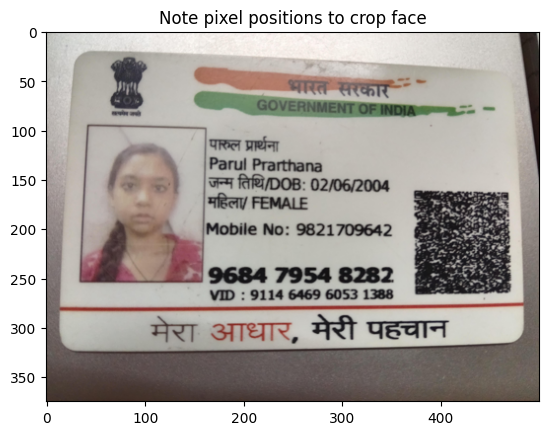

In [ ]:
# from PIL import Image
# import matplotlib.pyplot as plt

# # Load and display the ID image
# img = Image.open("id.jpg")

# # Resize for better viewing (optional)
# img_resized = img.resize((500, int(img.height * 500 / img.width)))

# # Show image with matplotlib
# plt.imshow(img_resized)
# plt.title("Note pixel positions to crop face")
# plt.axis("on")
# plt.show()


In [ ]:
# def scaled_manual_crop_id_face(input_path="id.jpg", output_path="id_face.jpg"):
#     original = Image.open(input_path)

#     # Resize used for annotation
#     display_width = 500
#     scale_factor = original.width / display_width

#     # Coordinates noted from resized image
#     x1, y1, x2, y2 = 30, 75, 140, 200

#     # Scale back to original dimensions
#     scaled_box = tuple(int(coord * scale_factor) for coord in (x1, y1, x2, y2))

#     # Crop and save
#     face_crop = original.crop(scaled_box)
#     face_crop.save(output_path)
#     print(f"✅ Face cropped using scaled coordinates and saved as {output_path}")

# # Run the function
# scaled_manual_crop_id_face()


✅ Face cropped using scaled coordinates and saved as id_face.jpg


In [ ]:
# def manual_crop_id_face(input_path="id.jpg", output_path="id_face.jpg"):
#     img = Image.open(input_path)

#     # Replace these values after inspecting the image above
#     # Example coordinates for a typical Aadhar layout:
#     face_crop = img.crop((60, 115, 160, 215))  # (left, top, right, bottom)

#     face_crop.save(output_path)
#     print("✅ Cropped face saved as", output_path)

# manual_crop_id_face()


✅ Cropped face saved as id_face.jpg


In [ ]:
import cv2

def detect_and_crop_face(image_path="id.jpg", output_path="id_face.jpg"):
    # Load image
    image = cv2.imread(image_path)
    if image is None:
        print("❌ Image not found")
        return

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Use Haar cascade for robust face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    if len(faces) == 0:
        print("❌ No face detected.")
        return

    # Loop through faces, crop first valid one
    for (x, y, w, h) in faces:
        face = image[y:y+h, x:x+w]
        cv2.imwrite(output_path, face)
        print(f"✅ Face detected and saved as {output_path}")
        return

# Run it
detect_and_crop_face()


✅ Face detected and saved as id_face.jpg


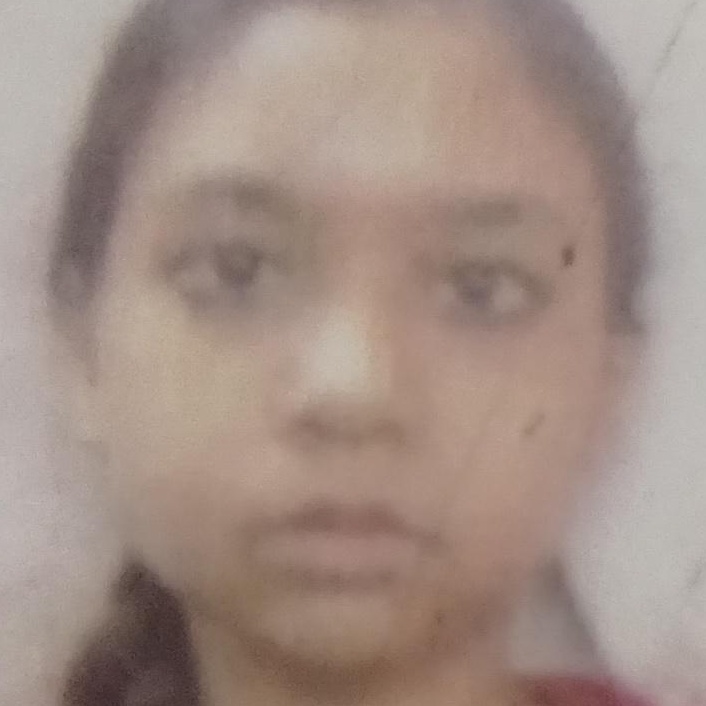

In [ ]:
Image.open("id_face.jpg")


In [ ]:
from deepface import DeepFace

result = DeepFace.verify(img1_path="id_face.jpg", img2_path="selfie.jpg")
print("Face Match Result:", result)


25-06-24 07:33:39 - Directory /root/.deepface has been created
25-06-24 07:33:39 - Directory /root/.deepface/weights has been created
25-06-24 07:33:44 - vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: /root/.deepface/weights/vgg_face_weights.h5
100%|██████████| 580M/580M [00:02<00:00, 213MB/s]


Face Match Result: {'verified': True, 'distance': 0.5553360791652309, 'threshold': 0.68, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 40, 'y': 32, 'w': 630, 'h': 630, 'left_eye': (479, 288), 'right_eye': (235, 265)}, 'img2': {'x': 98, 'y': 72, 'w': 239, 'h': 239, 'left_eye': (250, 159), 'right_eye': (168, 169)}}, 'time': 11.17}


In [ ]:
from datetime import datetime

def calculate_age(dob_string):
    try:
        dob = datetime.strptime(dob_string, "%d-%m-%Y")
    except:
        dob = datetime.strptime(dob_string, "%Y")
    today = datetime.today()
    age = today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))
    return age

age = calculate_age(dob)
print(f"Calculated Age: {age} years")


ValueError: time data '02/06/2004' does not match format '%Y'

In [ ]:
from datetime import datetime

def calculate_age(dob_string):
    try:
        # First, try parsing with DD/MM/YYYY format
        dob = datetime.strptime(dob_string, "%d/%m/%Y")
    except ValueError:
        try:
            # If that fails, try DD-MM-YYYY format
            dob = datetime.strptime(dob_string, "%d-%m-%Y")
        except ValueError:
             try:
                # If still fails, try parsing as just the year
                dob = datetime.strptime(dob_string, "%Y")
             except ValueError:
                 # Handle cases where neither format works
                 print(f"❌ Could not parse DOB from string: {dob_string}")
                 return "N/A" # Or raise an error, depending on desired behavior


    today = datetime.today()
    # Calculate age
    age = today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))
    return age

# Ensure the 'dob' variable exists from previous cells or rerun the extraction
# If you reran the previous cells, the 'dob' variable should be available.
# If running this cell in isolation after a fresh restart, you might need to define dob.
# Example if running alone:
# dob = '02/06/2004'

age = calculate_age(dob)
print(f"Calculated Age: {age} years")

Calculated Age: 21 years


In [ ]:
if result['verified'] and age >= 18:
    print("✅ User is verified and 18+")
elif not result['verified']:
    print("❌ Face does not match")
else:
    print("⚠️ User is underage")


✅ User is verified and 18+
